# **Model Training**

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive

drive.mount('/content/drive')

from scipy.io import loadmat

data = loadmat('/content/drive/MyDrive/Colab Notebooks/X1.mat')
dt = data['X1']

Mounted at /content/drive


In [4]:
dt = pd.DataFrame(dt)
dt.columns = ['x1', 'x_d1', 'alpha1','alpha_d1', 'voltage','time']
print(dt)

                  x1          x_d1    alpha1  alpha_d1    voltage  \
0       0.000000e+00  0.000000e+00  0.087266  0.000000  13.737170   
1       1.092909e-15  1.038168e-07  0.087266  0.000001  13.731268   
2       3.934225e-14  6.228419e-07  0.087266  0.000008  13.701798   
3       1.049889e-12  3.216497e-06  0.087266  0.000040  13.555479   
4       2.654519e-11  1.614808e-05  0.087266  0.000199  12.849086   
...              ...           ...       ...       ...        ...   
138250 -6.597897e-02 -4.700952e-04  3.141504  0.021431  -0.001540   
138251 -6.597904e-02 -4.698765e-04  3.141507  0.021431  -0.000732   
138252 -6.597912e-02 -4.696278e-04  3.141511  0.021430   0.005014   
138253 -6.597918e-02 -4.694490e-04  3.141513  0.021430   0.000602   
138254 -6.597924e-02 -4.692669e-04  3.141516  0.021429  -0.001263   

                time  
0       0.000000e+00  
1       2.105444e-08  
2       1.263267e-07  
3       6.526877e-07  
4       3.284493e-06  
...              ...  
138250  1.

In [5]:
X = dt.iloc[:,0:4] #only training on the first 4 columns
print(X)

                  x1          x_d1    alpha1  alpha_d1
0       0.000000e+00  0.000000e+00  0.087266  0.000000
1       1.092909e-15  1.038168e-07  0.087266  0.000001
2       3.934225e-14  6.228419e-07  0.087266  0.000008
3       1.049889e-12  3.216497e-06  0.087266  0.000040
4       2.654519e-11  1.614808e-05  0.087266  0.000199
...              ...           ...       ...       ...
138250 -6.597897e-02 -4.700952e-04  3.141504  0.021431
138251 -6.597904e-02 -4.698765e-04  3.141507  0.021431
138252 -6.597912e-02 -4.696278e-04  3.141511  0.021430
138253 -6.597918e-02 -4.694490e-04  3.141513  0.021430
138254 -6.597924e-02 -4.692669e-04  3.141516  0.021429

[138255 rows x 4 columns]


In [6]:
y = dt.iloc[:,4]
print(y)

0         13.737170
1         13.731268
2         13.701798
3         13.555479
4         12.849086
            ...    
138250    -0.001540
138251    -0.000732
138252     0.005014
138253     0.000602
138254    -0.001263
Name: voltage, Length: 138255, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(88483, 4)
(27651, 4)
(88483,)
(27651,)


In [11]:
# Reshape input data for LSTM
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])
X_val = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])

In [12]:
#changing the sequence length did not seem to hav a noticeable effect on the model performance

# def create_sequences(data, sequence_length):
#     sequences = []
#     labels = []
#     for i in range(len(data) - sequence_length):
#         seq = data[i : (i + sequence_length)]
#         label = data[i + sequence_length, -1]
#         sequences.append(seq)
#         labels.append(label)
#     return np.array(sequences), np.array(labels)

# sequence_length = 30
# X_train_seq, y_train_seq = create_sequences(X_train, sequence_length)
# X_test_seq, y_test_seq = create_sequences(X_test, sequence_length)
# X_val_seq, y_val_seq = create_sequences(X_val, sequence_length)

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))  # First LSTM layer
model.add(LSTM(units=50, return_sequences=True))  # Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
#model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

# Compile the model
optim = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - loss: 0.0658 - val_loss: 0.0258
Epoch 2/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - loss: 0.0177 - val_loss: 0.0117
Epoch 3/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - loss: 0.0138 - val_loss: 0.0100
Epoch 4/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 5/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - loss: 0.0036 - val_loss: 0.0235
Epoch 6/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 0.0059 - val_loss: 0.0072
Epoch 7/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - loss: 0.0060 - val_loss: 0.0074
Epoch 8/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 0.0029 - val_loss: 0.0073
Epoch 9/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 45s 9ms/step - loss: 0.0068 - val_loss: 0.0079
Epoch 10/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - loss: 0.0060 - val_loss: 0.0070
Epoch 11/40
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - loss: 0.0032 - val_loss: 0.0069
Epoch 12/40
2766/27

# **Testing and validation loss**

In [15]:
y_pred = model.predict(X_test)

865/865 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


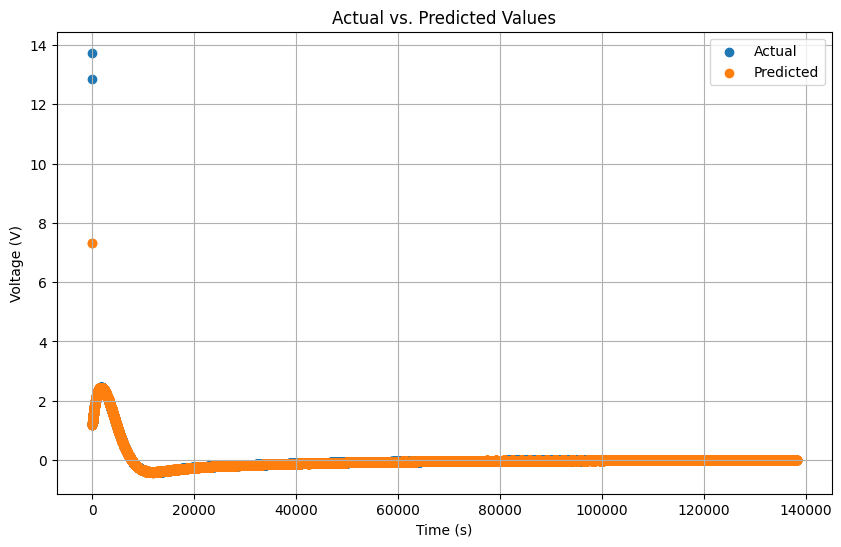

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(y_test.index, y_test.values, label='Actual')  # Scatter plot for actual values
plt.scatter(y_test.index, y_pred, label='Predicted')  # Scatter plot for predicted values
plt.xlabel('Time (s)')  # Set x-axis label
plt.ylabel('Voltage (V)')  # Set y-axis label
plt.title('Actual vs. Predicted Values')  # Set plot title
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines for better visualization
plt.show()  # Display the plot

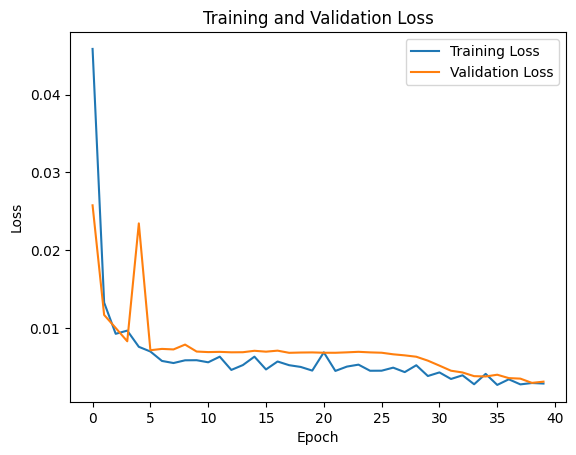

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.9855054089088895


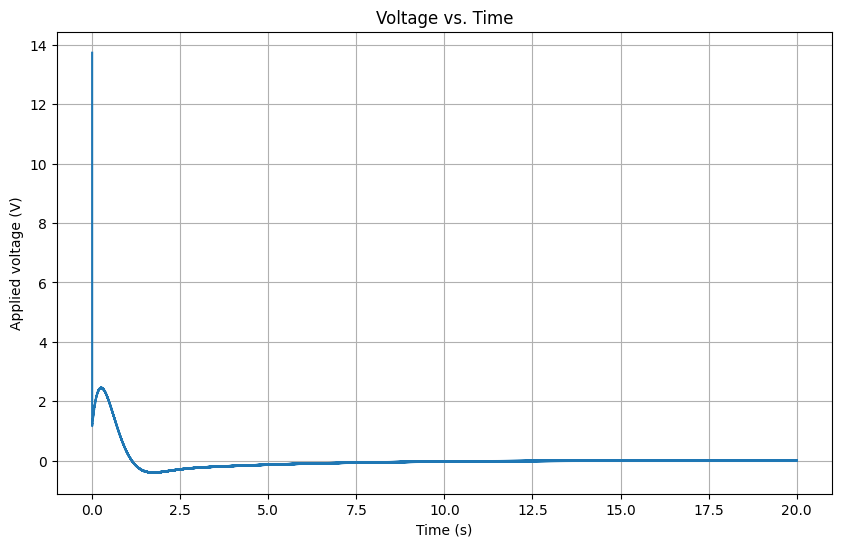

In [19]:
import matplotlib.pyplot as plt

x_col = dt.columns[5]
y_col = dt.columns[4]

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(dt[x_col], dt[y_col])
plt.xlabel('Time (s)')  # Set x-axis label
plt.ylabel('Applied voltage (V)')  # Set y-axis label
plt.title('Voltage vs. Time')  # Set plot title
plt.grid(True)  # Add gridlines for better visualization
plt.show()  # Display the plot

# **Try testing on similar systems**

In [20]:
data2 = loadmat('/content/drive/MyDrive/Colab Notebooks/X2.mat')
dt2 = data2['X2']
dt2 = pd.DataFrame(dt2)
dt2.columns = ['x2', 'x_d2', 'alpha2','alpha_d2', 'voltage2','time2']
X2 = dt2.iloc[:,0:4]
y2 = dt2.iloc[:,4]

In [21]:
X2 = X2.values.reshape(X2.shape[0], 1, X2.shape[1])
y_pred2 = model.predict(X2)

2375/2375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


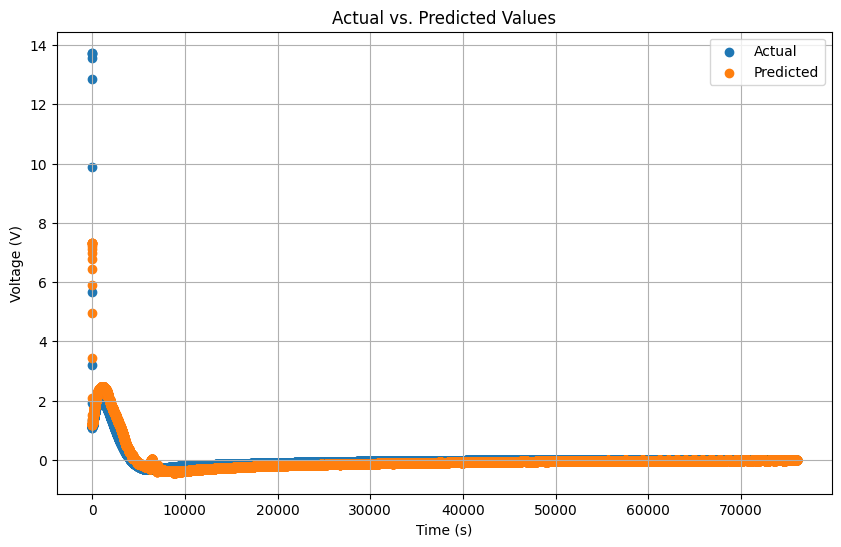

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(y2.index, y2.values, label='Actual')  # Scatter plot for actual values
plt.scatter(y2.index, y_pred2, label='Predicted')  # Scatter plot for predicted values
plt.xlabel('Time (s)')  # Set x-axis label
plt.ylabel('Voltage (V)')  # Set y-axis label
plt.title('Actual vs. Predicted Values')  # Set plot title
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines for better visualization
plt.show()  # Display the plot

In [23]:
r2 = r2_score(y2, y_pred2)
print(f"R-squared: {r2}")

R-squared: 0.8565267508097968


In [24]:
data3 = loadmat('/content/drive/MyDrive/Colab Notebooks/X3.mat')
dt3 = data3['X3']
dt3 = pd.DataFrame(dt3)
dt3.columns = ['x3', 'x_d3', 'alpha3','alpha_d3', 'voltage3','time3']
X3 = dt3.iloc[:,0:4]
y3 = dt3.iloc[:,4]

In [25]:
X3 = X3.values.reshape(X3.shape[0], 1, X3.shape[1])
y_pred3 = model.predict(X3)

5401/5401 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step


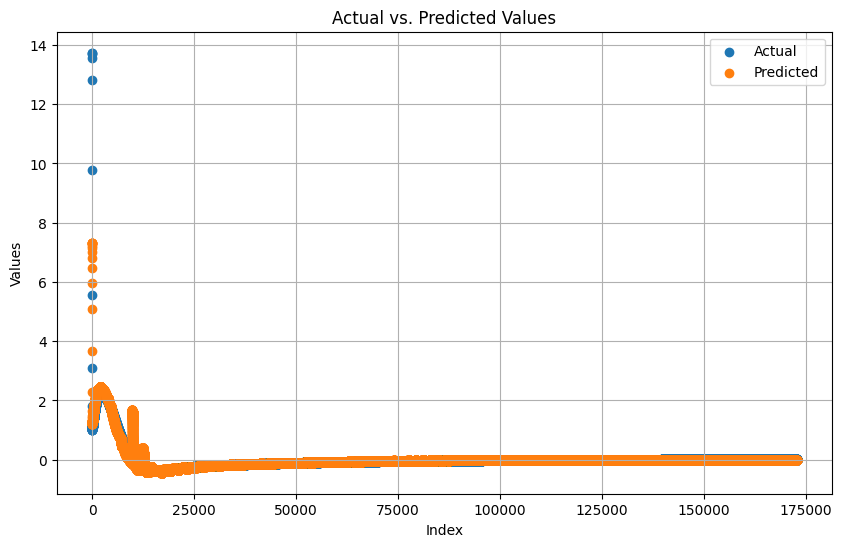

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(y3.index, y3.values, label='Actual')  # Scatter plot for actual values
plt.scatter(y3.index, y_pred3, label='Predicted')  # Scatter plot for predicted values
plt.xlabel('Time (s)')  # Set x-axis label
plt.ylabel('Voltage (V)')  # Set y-axis label
plt.title('Actual vs. Predicted Values')  # Set plot title
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines for better visualization
plt.show()  # Display the plot

In [27]:
r2 = r2_score(y3, y_pred3)
print(f"R-squared: {r2}")

R-squared: 0.9495726282589145


# **Adding noise**

2375/2375 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


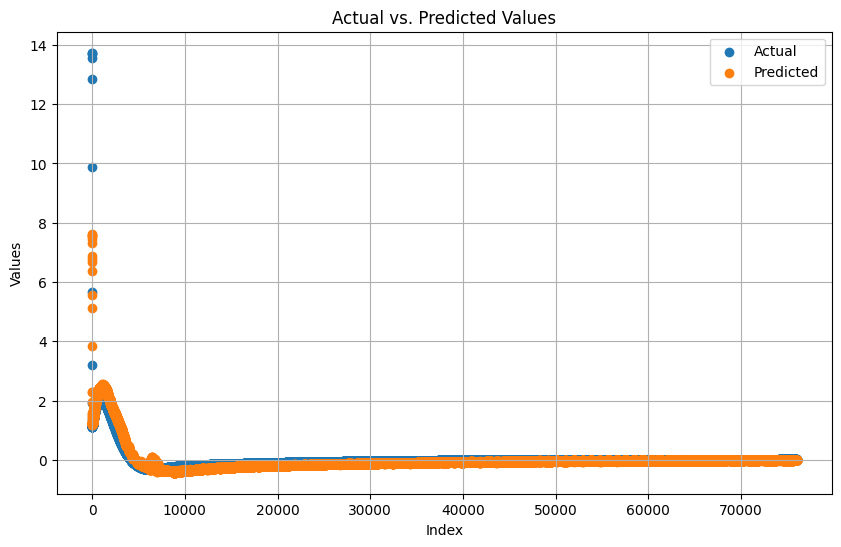

In [28]:
noise_scale = 0.005 * np.std(X2)
noise = np.random.normal(loc=0, scale=noise_scale, size=X2.shape)
X2_noisy = X2 + noise

y_pred2_noisy = model.predict(X2_noisy)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(y2.index, y2.values, label='Actual')  # Scatter plot for actual values
plt.scatter(y2.index, y_pred2_noisy, label='Predicted')  # Scatter plot for predicted values
plt.xlabel('Time (s)')  # Set x-axis label
plt.ylabel('Voltage (V)')  # Set y-axis label
plt.title('Actual vs. Predicted Values')  # Set plot title
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines for better visualization
plt.show()  # Display the plot

In [29]:
r2 = r2_score(y2, y_pred2_noisy)
print(f"R-squared: {r2}")

R-squared: 0.8441416149362436


# **Testing on a different physical system: inverted pendulum on a cart**

In [30]:
data4 = loadmat('/content/drive/MyDrive/Colab Notebooks/X4.mat')
dt4 = data4['X4']
dt4 = pd.DataFrame(dt4)
dt4.columns = ['x4', 'x_d4', 'alpha4','alpha_d4', 'voltage4','time4']
X4 = dt4.iloc[:,0:4]
y4 = dt4.iloc[:,4]

In [31]:
X4 = X4.values.reshape(X4.shape[0], 1, X4.shape[1])
y_pred4 = model.predict(X4)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


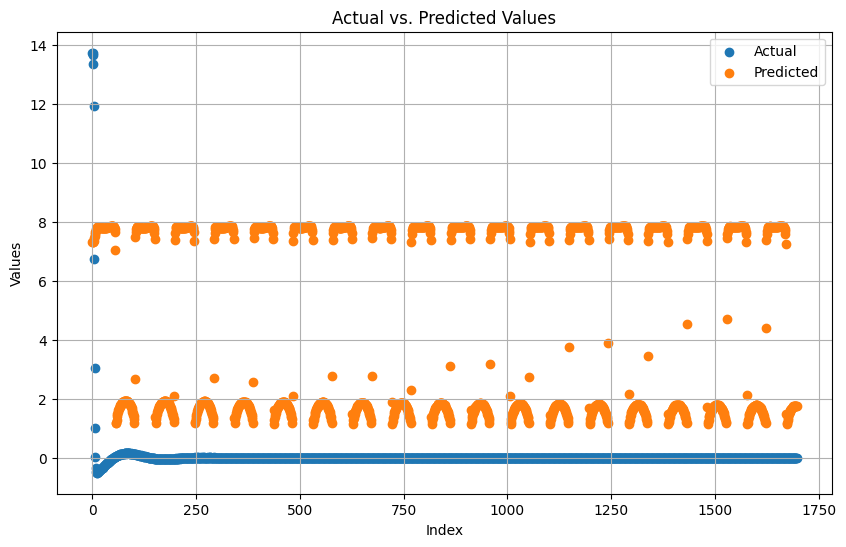

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(y4.index, y4.values, label='Actual')  # Scatter plot for actual values
plt.scatter(y4.index, y_pred4, label='Predicted')  # Scatter plot for predicted values
plt.xlabel('Time (s)')  # Set x-axis label
plt.ylabel('Force (N)')  # Set y-axis label
plt.title('Actual vs. Predicted Values')  # Set plot title
plt.legend()  # Show legend
plt.grid(True)  # Add gridlines for better visualization
plt.show()  # Display the plot

In [33]:
r2 = r2_score(y4, y_pred4)
print(f"R-squared: {r2}")

R-squared: -57.82902636374054


# **Plotting the states vs. time for the additional testing data**

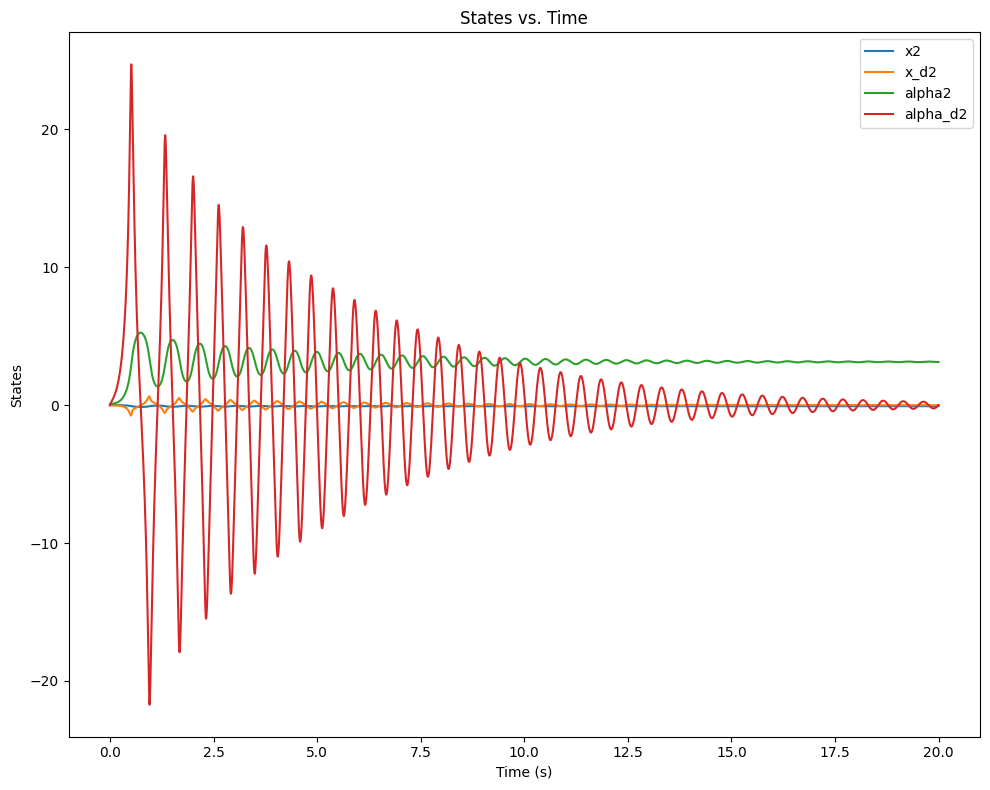

In [36]:
import matplotlib.pyplot as plt

# Assuming 'dt' is your DataFrame

# Get the column names
x_cols = dt2.columns[:4]  # First 4 columns
y_col = dt2.columns[-1]   # Last column

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single plot

for x_col in x_cols:
    ax.plot(dt2[y_col], dt2[x_col], label=x_col)  # Plot each column against the last column

ax.set_xlabel('Time (s)')  # Set x-axis label
ax.set_ylabel('States')  # Set y-axis label
ax.set_title('States vs. Time')  # Set plot title
ax.legend()  # Add a legend to distinguish the lines

plt.tight_layout()  # Adjust spacing
plt.show()  # Display the plot

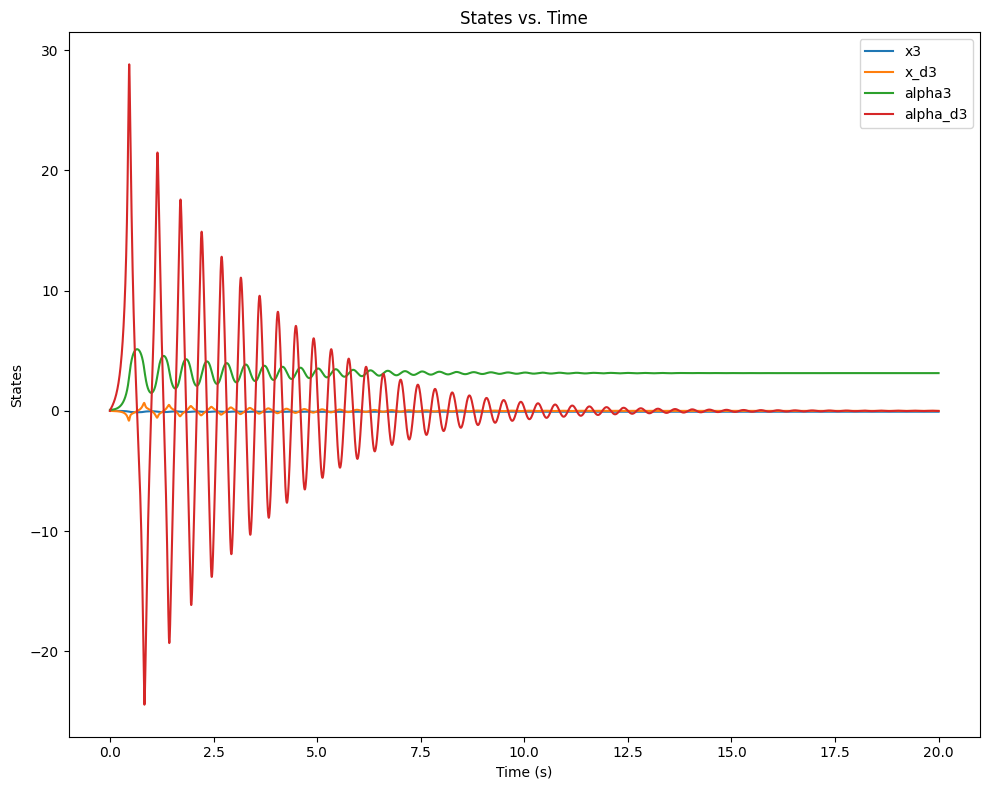

In [37]:
# Assuming 'dt' is your DataFrame

# Get the column names
x_cols = dt3.columns[:4]  # First 4 columns
y_col = dt3.columns[-1]   # Last column

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single plot

for x_col in x_cols:
    ax.plot(dt3[y_col], dt3[x_col], label=x_col)  # Plot each column against the last column

ax.set_xlabel('Time (s)')  # Set x-axis label
ax.set_ylabel('States')  # Set y-axis label
ax.set_title('States vs. Time')  # Set plot title
ax.legend()  # Add a legend to distinguish the lines

plt.tight_layout()  # Adjust spacing
plt.show()  # Display the plot

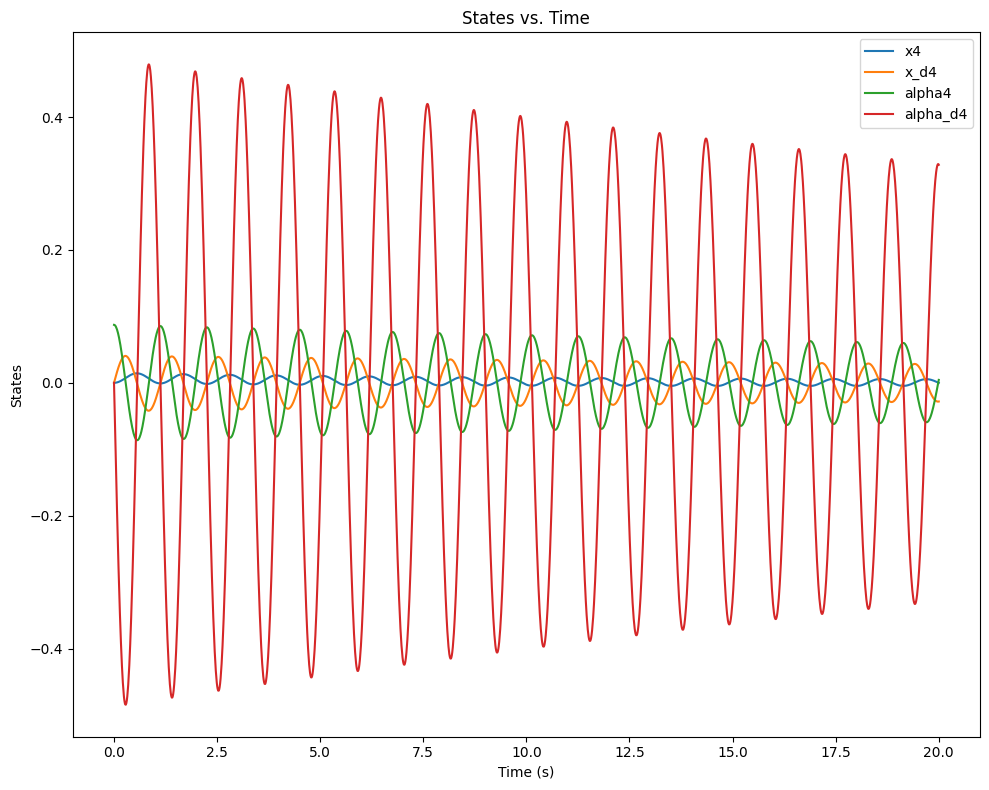

In [38]:
# Assuming 'dt' is your DataFrame

# Get the column names
x_cols = dt4.columns[:4]  # First 4 columns
y_col = dt4.columns[-1]   # Last column

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))  # Create a single plot

for x_col in x_cols:
    ax.plot(dt4[y_col], dt4[x_col], label=x_col)  # Plot each column against the last column

ax.set_xlabel('Time (s)')  # Set x-axis label
ax.set_ylabel('States')  # Set y-axis label
ax.set_title('States vs. Time')  # Set plot title
ax.legend()  # Add a legend to distinguish the lines

plt.tight_layout()  # Adjust spacing
plt.show()  # Display the plot